In [1]:
import pandas as pd
import pmdarima as pm
from sklearn.metrics import mean_absolute_percentage_error
from prophet import Prophet
import matplotlib.pyplot as plt
%store -r date_list
%store -r cpi_list
%store -r ppi_list
%store -r unemployed_ratio_list
%store -r update_sp500

In [2]:
prophet_case_sp500 = pd.DataFrame()
prophet_case_sp500['ds'] = date_list
prophet_case_sp500['cpi'] = cpi_list
prophet_case_sp500['ppi'] = ppi_list
prophet_case_sp500['unemployment_ratio'] = unemployed_ratio_list
prophet_case_sp500_update = pd.concat([prophet_case_sp500, update_sp500], axis=1).dropna()
prophet_case_sp500_update['ds'] = pd.to_datetime(prophet_case_sp500_update['ds'])
prophet_case_sp500_update.rename(columns={"Price": "y"}, inplace = True)
modified_sp500 = prophet_case_sp500_update.loc[prophet_case_sp500_update['ds'] >= '2009-01-31']
final_find_sp500_case_optimized = modified_sp500.loc[modified_sp500['ds'] <= '2019-12-31']
train=final_find_sp500_case_optimized[(final_find_sp500_case_optimized['ds'] <= '2015-08-31')]
test=final_find_sp500_case_optimized[(final_find_sp500_case_optimized['ds'] > '2015-08-31')]

In [3]:
cpi_camp = pd.DataFrame()
cpi_camp['ds'] = date_list
cpi_camp['y'] = cpi_list
cpi_camp['ds'] = pd.to_datetime(cpi_camp['ds'])
train = cpi_camp[(cpi_camp['ds'] <= '2015-08-31')]
test = cpi_camp[(cpi_camp['ds'] > '2015-08-31')]
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=len(test), freq='MS')
forecast = m.predict(future)
cpi_forecast = forecast['yhat']

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [4]:
ppi_camp = pd.DataFrame()
ppi_camp['ds'] = date_list
ppi_camp['y'] = ppi_list
ppi_camp['ds'] = pd.to_datetime(ppi_camp['ds'])
train = ppi_camp[(ppi_camp['ds'] <= '2015-08-31')]
test = ppi_camp[(ppi_camp['ds'] > '2015-08-31')]
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=len(test), freq='MS')
forecast = m.predict(future)
ppi_forecast = forecast['yhat']

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [5]:
unemployed_camp = pd.DataFrame()
unemployed_camp['ds'] = date_list
unemployed_camp['y'] = ppi_list
unemployed_camp['ds'] = pd.to_datetime(unemployed_camp['ds'])
train = unemployed_camp[(unemployed_camp['ds'] <= '2015-08-31')]
test = unemployed_camp[(unemployed_camp['ds'] > '2015-08-31')]
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=len(test), freq='MS')
forecast = m.predict(future)
unemployed_forecast = forecast['yhat']

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [6]:
prophet_case_sp500 = pd.DataFrame()
prophet_case_sp500['ds'] = final_find_sp500_case_optimized['ds']
prophet_case_sp500['cpi'] = cpi_forecast
prophet_case_sp500['ppi'] = ppi_forecast
prophet_case_sp500['unemployment_ratio'] = unemployed_forecast
prophet_case_sp500_update = pd.concat([prophet_case_sp500, update_sp500], axis=1).dropna()
prophet_case_sp500_update['ds'] = pd.to_datetime(prophet_case_sp500_update['ds'])
prophet_case_sp500_update.rename(columns={"Price": "y"}, inplace = True)
train=prophet_case_sp500_update[(prophet_case_sp500_update['ds'] <= '2015-08-31')]
test=prophet_case_sp500_update[(prophet_case_sp500_update['ds'] > '2015-08-31')]
lockdowns = pd.DataFrame([
    {'holiday': 'lockdown_1', 'ds': '2020-03-15', 'lower_window': 0, 'ds_upper': '2020-03-22'},
])
for t_col in ['ds', 'ds_upper']:
    lockdowns[t_col] = pd.to_datetime(lockdowns[t_col])
lockdowns['upper_window'] = (lockdowns['ds_upper'] - lockdowns['ds']).dt.days


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 109 to 187
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ds                  79 non-null     datetime64[ns]
 1   cpi                 79 non-null     float64       
 2   ppi                 79 non-null     float64       
 3   unemployment_ratio  79 non-null     float64       
 4   y                   79 non-null     float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 3.7 KB


0.05655311723923204

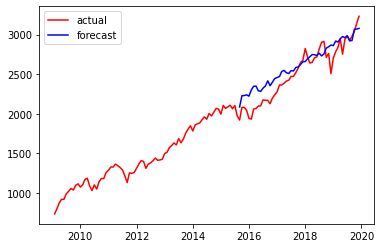

In [7]:
m1 = Prophet(mcmc_samples=600, holidays=lockdowns)
m1.add_regressor('cpi')
m1.add_regressor('ppi')
m1.add_regressor('unemployment_ratio')
train.info()
m1.fit(train)
forecast2 = m1.predict(test)
final_df_2 = pd.concat((forecast2['yhat'], test.reset_index()), axis=1)
plt.plot(final_find_sp500_case_optimized['ds'], final_find_sp500_case_optimized['y'], color='red', label='actual')
plt.plot(final_df_2['ds'], final_df_2['yhat'], color='blue', label='forecast')
plt.legend()
mean_absolute_percentage_error(final_df_2['y'], final_df_2['yhat'])

In [8]:
m_data_prophet_variable_holiday = final_df_2
%store m_data_prophet_variable_holiday

Stored 'm_data_prophet_variable_holiday' (DataFrame)
